In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [26]:
insecurity_df = pd.read_csv("INSECURITY.csv")
taxes_df = pd.read_csv("TAXES.csv")
socioeconomic_df = pd.read_csv("SOCIOECONOMIC.csv")

In [27]:
insecurity_df['County and State Key'] = insecurity_df['County'] + ", " + insecurity_df['State']
taxes_df['County and State Key'] = taxes_df['County'] + ", " + taxes_df['State']
socioeconomic_df['County and State Key'] = socioeconomic_df['County'] + ", " + socioeconomic_df['State']

In [28]:
merge_df = pd.merge(insecurity_df,taxes_df,on='County and State Key',how='inner')
merge_df = pd.merge(merge_df,socioeconomic_df,on='County and State Key',how='inner')

In [29]:
# drop any incomplete rows so we can work with a complete set
# merge_df = merge_df.dropna()
# Drop any rows that have a soda tax of zero
merge_df = merge_df.loc[~(merge_df['SODATAX_STORES14'] == 0),:]
merge_df.count()

FIPS_x                  2490
State_x                 2490
County_x                2490
FOODINSEC_12_14         2490
FOODINSEC_15_17         2490
CH_FOODINSEC_14_17      2490
VLFOODSEC_12_14         2490
VLFOODSEC_15_17         2490
CH_VLFOODSEC_14_17      2490
Unnamed: 9                 0
County and State Key    2490
FIPS_y                  2490
State_y                 2490
County_y                2490
SODATAX_STORES14        2490
SODATAX_VENDM14         2490
CHIPSTAX_STORES14       2490
CHIPSTAX_VENDM14        2490
FOOD_TAX14              2490
FIPS                    2490
State                   2490
County                  2490
PCT_NHWHITE10           2490
PCT_NHBLACK10           2490
PCT_HISP10              2490
PCT_NHASIAN10           2490
PCT_NHNA10              2490
PCT_NHPI10              2490
PCT_65OLDER10           2490
PCT_18YOUNGER10         2490
MEDHHINC15              2484
POVRATE15               2484
PERPOV10                2490
CHILDPOVRATE15          2484
PERCHLDPOV10  

In [30]:
# Bin the data into groups
# Bins and Labels
income_bins = [0,42508,51294,130000]
bin_labels = ['Low','Medium','High']
# Create bins
merge_df['Income Bracket'] = pd.cut(merge_df['MEDHHINC15'], bins=income_bins,labels=bin_labels)
# Test to make sure bins worked
test_df = merge_df[['Income Bracket','MEDHHINC15']]
test_df = test_df.groupby('Income Bracket',observed=False)['MEDHHINC15'].count()
test_df

Income Bracket
Low       786
Medium    856
High      842
Name: MEDHHINC15, dtype: int64

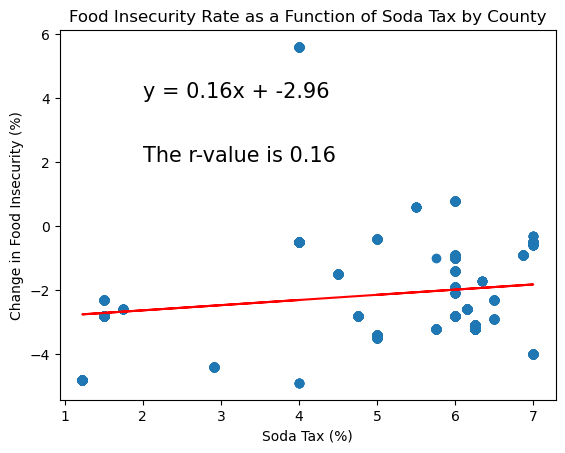

In [49]:
food_insecurity = merge_df['CH_FOODINSEC_14_17']
soda_tax = merge_df['SODATAX_STORES14']
# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(soda_tax,food_insecurity)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = soda_tax * slope + intercept
rvalue = round(rvalue,2)
# plot
plt.scatter(soda_tax,food_insecurity)
plt.xlabel('Soda Tax (%)')
plt.ylabel('Change in Food Insecurity (%)')
plt.title('Food Insecurity Rate as a Function of Soda Tax by County')
plt.annotate(line_eq,(2,4),fontsize=15,color="black")
plt.annotate((f"The r-value is {rvalue}"),(2,2), fontsize=15, color="black")
plt.plot(soda_tax,regress_values,'r-')
plt.savefig("Food Insecurity Rate as a Function of Soda Tax by County")
plt.show()

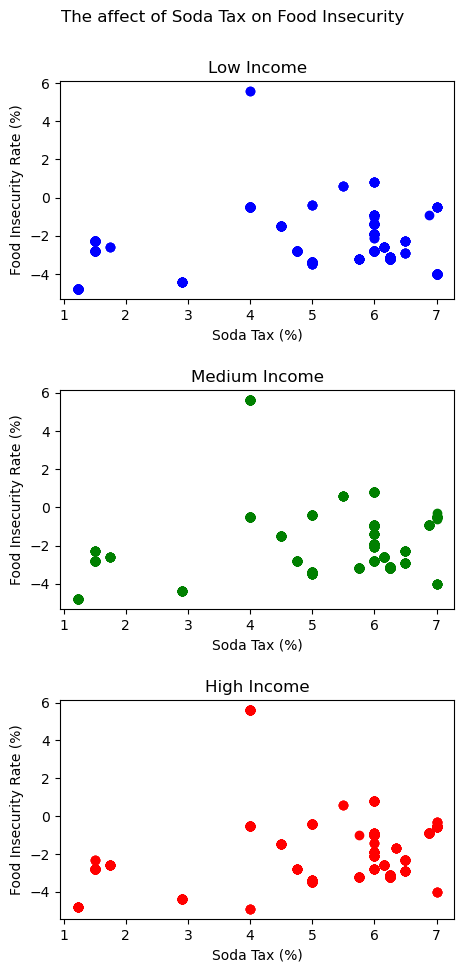

In [32]:
food_insecurity_low = merge_df.loc[(merge_df['Income Bracket'] == 'Low'),'CH_FOODINSEC_14_17']
soda_tax_low = merge_df.loc[(merge_df['Income Bracket'] == 'Low'),'SODATAX_STORES14']
food_insecurity_med = merge_df.loc[(merge_df['Income Bracket'] == 'Medium'),'CH_FOODINSEC_14_17']
soda_tax_med = merge_df.loc[(merge_df['Income Bracket'] == 'Medium'),'SODATAX_STORES14']
food_insecurity_high = merge_df.loc[(merge_df['Income Bracket'] == 'High'),'CH_FOODINSEC_14_17']
soda_tax_high = merge_df.loc[(merge_df['Income Bracket'] == 'High'),'SODATAX_STORES14']
plt.figure(figsize=(5, 10))
plt.subplot(3,1,1)
plt.scatter(soda_tax_low,food_insecurity_low,color='blue')
plt.xlabel('Soda Tax (%)')
plt.ylabel('Food Insecurity Rate (%)')
plt.title('Low Income')
plt.subplot(3,1,2)
plt.scatter(soda_tax_med,food_insecurity_med,color='green')
plt.xlabel('Soda Tax (%)')
plt.ylabel('Food Insecurity Rate (%)')
plt.title('Medium Income')
plt.subplot(3,1,3)
plt.scatter(soda_tax_high,food_insecurity_high,color='red')
plt.xlabel('Soda Tax (%)')
plt.ylabel('Food Insecurity Rate (%)')
plt.title('High Income')
plt.suptitle('The affect of Soda Tax on Food Insecurity')
plt.tight_layout(pad=2.0)
plt.show()

In [33]:
# Group Key fields by state for better figures
soda_tax_by_st = merge_df.groupby('State')['SODATAX_STORES14'].mean()
avg_food_insecurity_by_st = merge_df.groupby('State')['CH_FOODINSEC_14_17'].mean()
avg_med_inc_by_st = merge_df.groupby('State')['MEDHHINC15'].mean()
state_df = pd.DataFrame({"Soda Tax in Stores (%)": soda_tax_by_st,
                       "Average Change in Food Insecurity (%)":avg_food_insecurity_by_st,
                       "Average Median Income ($)":avg_med_inc_by_st})
state_df.head()

,Soda Tax in Stores (%),Average Change in Food Insecurity (%),Average Median Income ($)
State,,,
AL,4.00,-0.5,39830.104478
AR,1.50,-2.3,38592.680000
CA,6.50,-2.3,57650.931034
CO,2.91,-4.4,53810.531250
CT,6.35,-1.7,72445.125000


In [34]:
# Bin the new dataframe
# Find max income for bins
max_inc = state_df['Average Median Income ($)'].max()
# Bins and Labels
income_bins = [0,47000,56000,130000]
bin_labels = ['Low','Medium','High']
# Create bins
state_df['Income Bracket'] = pd.cut(state_df['Average Median Income ($)'], bins=income_bins,labels=bin_labels)
# Test to make sure bins worked
test_df = state_df[['Income Bracket','Average Median Income ($)']]
test_df = test_df.groupby('Income Bracket',observed=False)['Average Median Income ($)'].count()

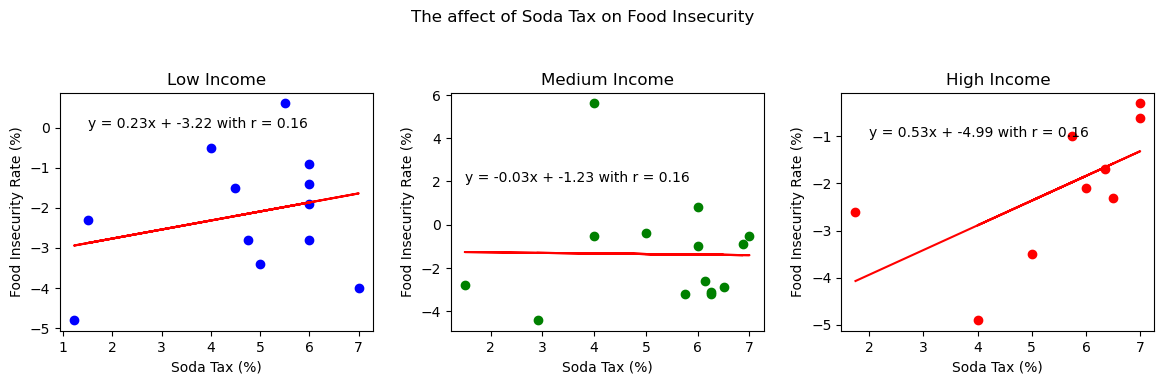

In [50]:
food_insecurity_low = state_df.loc[(state_df['Income Bracket'] == 'Low'),'Average Change in Food Insecurity (%)']
soda_tax_low = state_df.loc[(state_df['Income Bracket'] == 'Low'),'Soda Tax in Stores (%)']
food_insecurity_med = state_df.loc[(state_df['Income Bracket'] == 'Medium'),'Average Change in Food Insecurity (%)']
soda_tax_med = state_df.loc[(state_df['Income Bracket'] == 'Medium'),'Soda Tax in Stores (%)']
food_insecurity_high = state_df.loc[(state_df['Income Bracket'] == 'High'),'Average Change in Food Insecurity (%)']
soda_tax_high = state_df.loc[(state_df['Income Bracket'] == 'High'),'Soda Tax in Stores (%)']
# Create lin reg equation for each chart
groups = state_df['Income Bracket'].unique()
equation_list = []
equation_line = []
for group in groups:
    group_data = state_df[state_df['Income Bracket'] == group]
    slope, intercept, r_value, p_value, std_err = linregress(group_data['Soda Tax in Stores (%)'], group_data['Average Change in Food Insecurity (%)'])
    x_values = group_data['Soda Tax in Stores (%)']
    # Build equation for each group
    Equation = f"y = {slope:.2f}x + {intercept:.2f} with r = {round(rvalue,2)}"
    line = x_values * slope + intercept
    # store equation in list
    equation_list.append(Equation)
    equation_line.append(line)
plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
plt.annotate(equation_list[0],(1.5,0),fontsize=10,color="black")
plt.plot(soda_tax_low,equation_line[0],'r-')
plt.scatter(soda_tax_low,food_insecurity_low,color='blue')
plt.xlabel('Soda Tax (%)')
plt.ylabel('Food Insecurity Rate (%)')
plt.title('Low Income')


plt.subplot(1,3,2)
plt.scatter(soda_tax_med,food_insecurity_med,color='green')
plt.annotate(equation_list[2],(1.5,2),fontsize=10,color="black")
plt.plot(soda_tax_med,equation_line[2],'r-')
plt.xlabel('Soda Tax (%)')
plt.ylabel('Food Insecurity Rate (%)')
plt.title('Medium Income')


plt.subplot(1,3,3)
plt.annotate(equation_list[1],(2,-1),fontsize=10,color="black")
plt.plot(soda_tax_high,equation_line[1],'r-')
plt.scatter(soda_tax_high,food_insecurity_high,color='red')
plt.xlabel('Soda Tax (%)')
plt.ylabel('Food Insecurity Rate (%)')
plt.title('High Income')


plt.suptitle('The affect of Soda Tax on Food Insecurity')
plt.tight_layout(pad=2.0)
plt.savefig("The affect of Soda Tax on Food Insecurity")
plt.show()